In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd

%matplotlib inline
plt.rcParams['figure.figsize'] = (16,10)

In [7]:
aDF = pd.read_csv(
    'https://opendata.ecdc.europa.eu/covid19/casedistribution/csv', 
    parse_dates=['dateRep'],
    index_col='dateRep', 
    dayfirst=True
)
aDF.sort_index(inplace=True)

In [8]:
aDF.head()

,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp
dateRep,,,,,,,,,,
2019-12-31,31,12,2019,0,0,Ecuador,EC,ECU,17084357.0,America
2019-12-31,31,12,2019,0,0,Iraq,IQ,IRQ,38433600.0,Asia
2019-12-31,31,12,2019,0,0,Bahrain,BH,BHR,1569439.0,Asia
2019-12-31,31,12,2019,0,0,Netherlands,NL,NLD,17231017.0,Europe
2019-12-31,31,12,2019,0,0,Luxembourg,LU,LUX,607728.0,Europe


<BarContainer object of 121 artists>

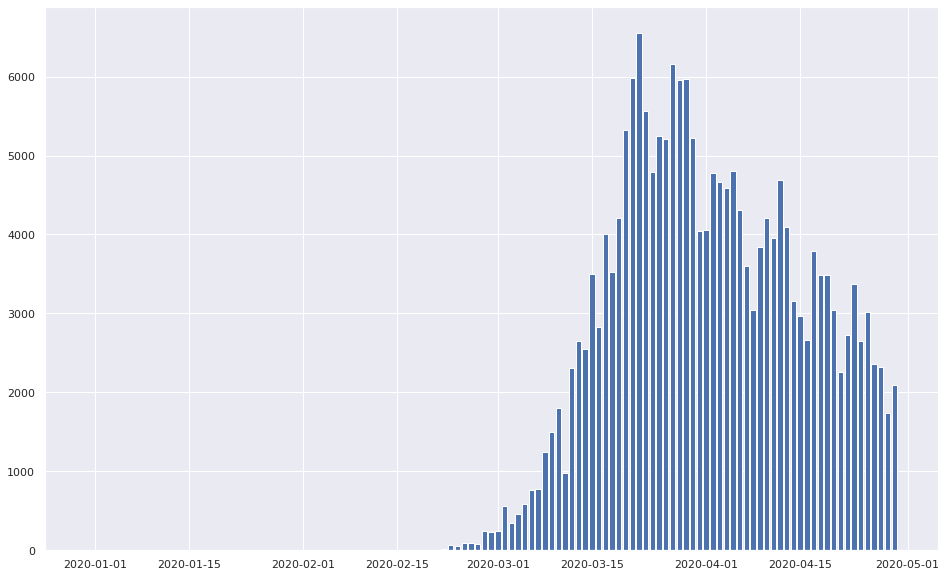

In [65]:
bDF = aDF[aDF['countriesAndTerritories']=='Italy']

fig, ax = plt.subplots()

ax.bar(bDF.index, bDF['cases'])

<BarContainer object of 68 artists>

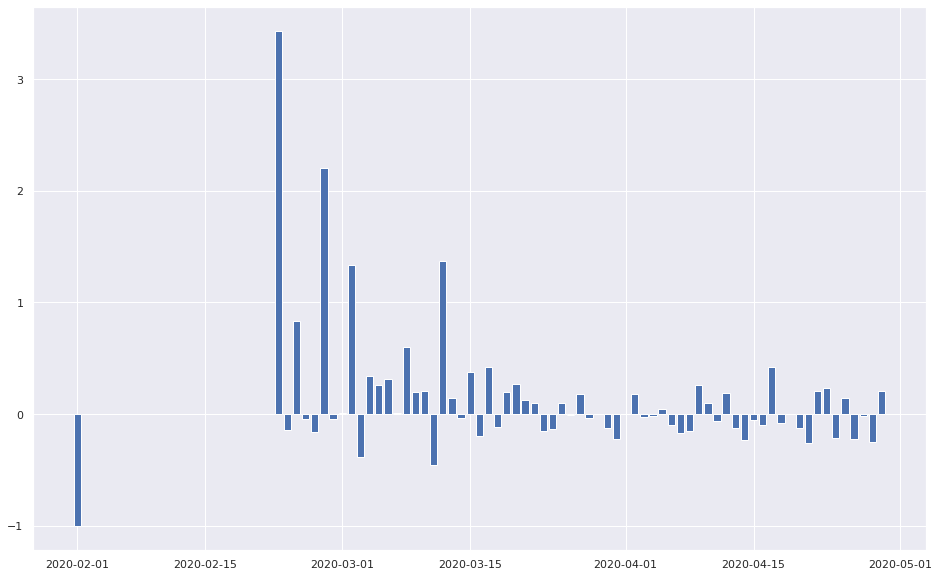

In [66]:
cDF = bDF['cases'].pct_change().replace([-np.inf, np.inf], np.nan).dropna()

fig, ax = plt.subplots()
ax.bar(cDF.index, cDF.values)

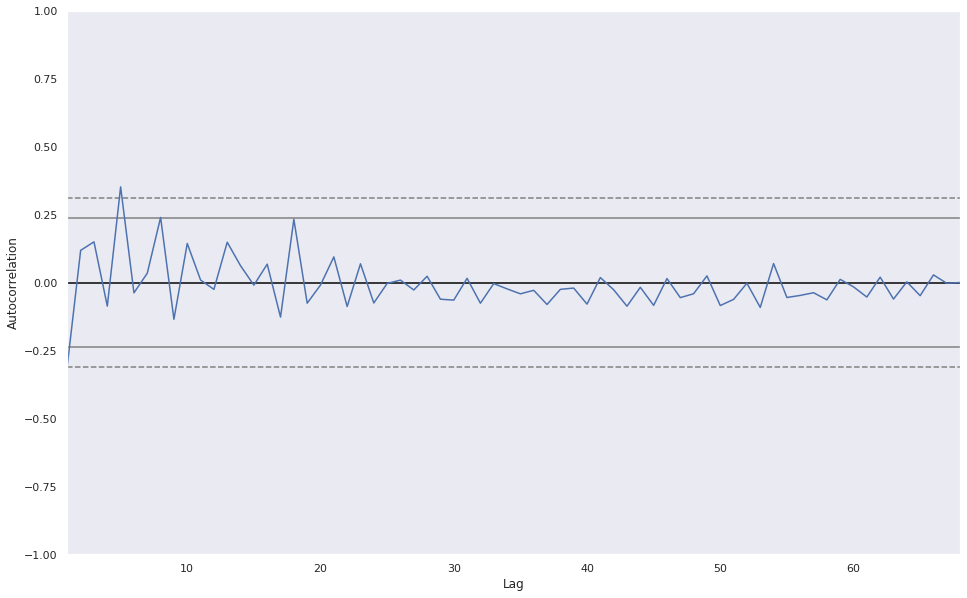

What about the same thing worldwide...

<BarContainer object of 121 artists>

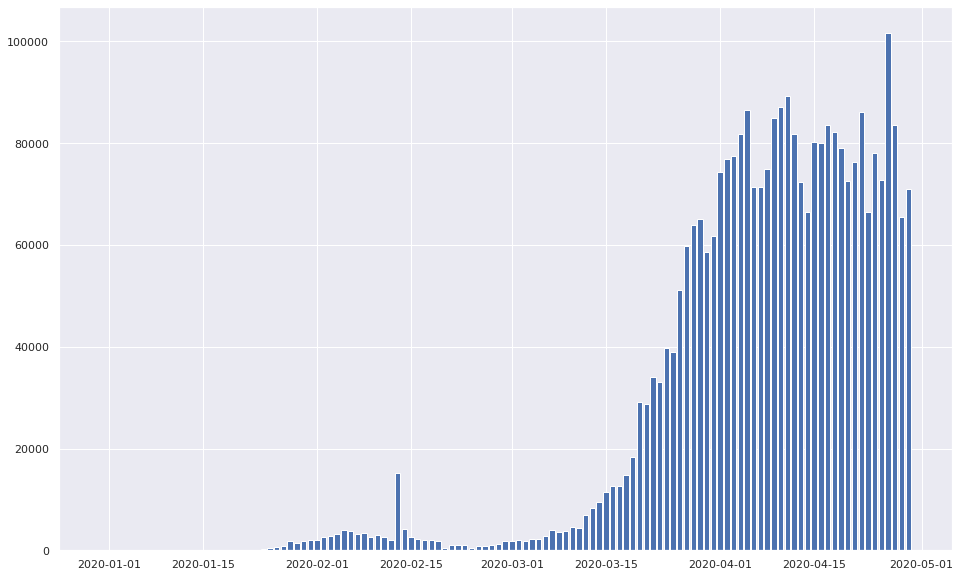

In [68]:
eDF = aDF.groupby('dateRep')['cases'].sum()

fig, ax = plt.subplots()
ax.bar(eDF.index, eDF.values)


<BarContainer object of 108 artists>

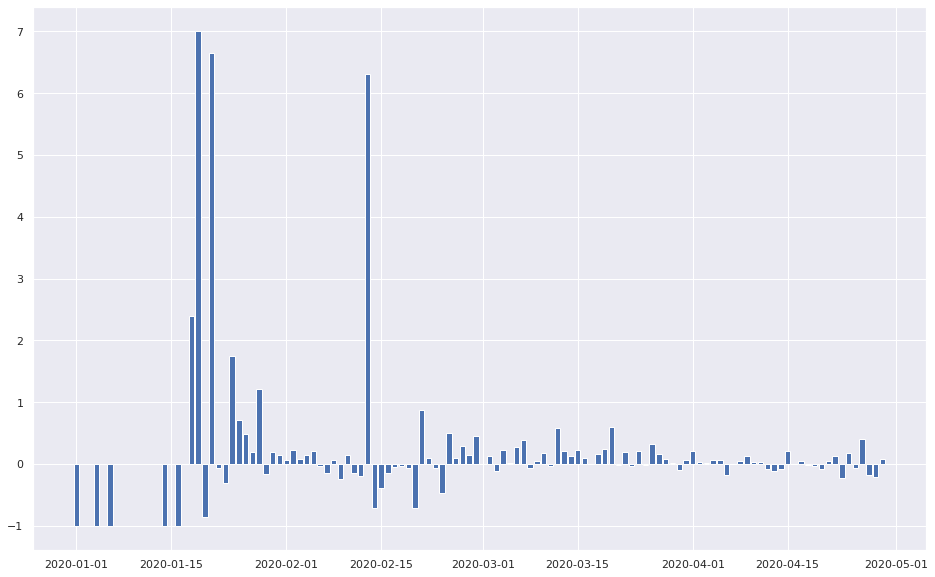

In [69]:
fDF = eDF.pct_change().replace([-np.inf, np.inf], np.nan).dropna()

fig, ax = plt.subplots()
ax.bar(fDF.index, fDF.values)

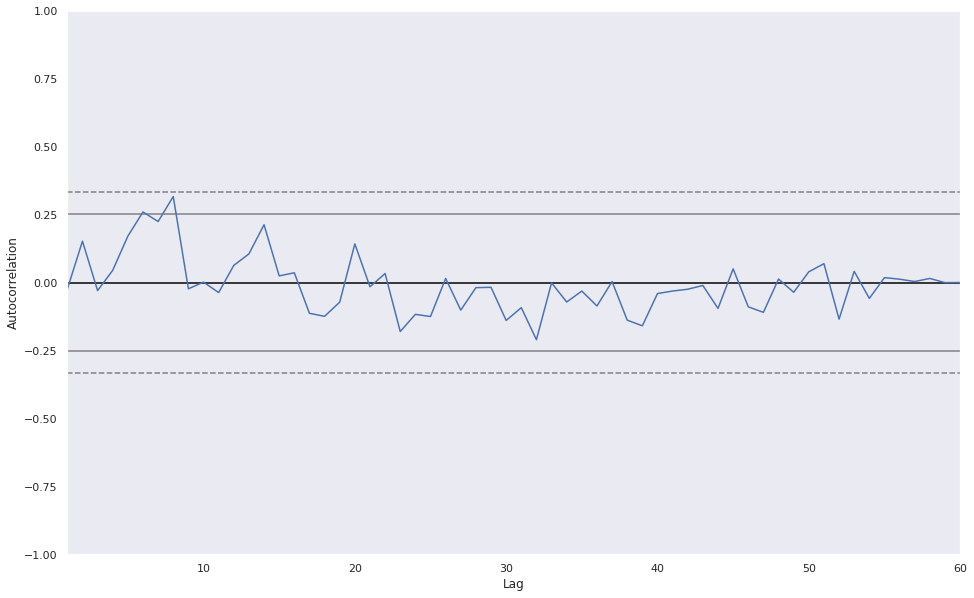

In [73]:
pd.plotting.autocorrelation_plot(fDF['2020-03-01':])